Hvis den normale personen skal tjene ekstra penger uten å ta opp en tilleggsjobb, så må han spare penger og investere dem. Han har ikke så mye sparingsmargin hver måned, men han kan skvise seg til å spare noen tusen. Men hva kan han forvente seg av avkastning og profitt over alle investeringsårene sine? Hvilke risikoer er han utsatt for? Programmet nedenfor er et forsøk på å simulere et realistisk investeringsforløp med en passiv investeringsstrategi. For å få en god følelse av hva risikoen faktisk innebærer, så bør du kjøre simulasjonen mange ganger.

(For å bruke scriptet selv, last ned Anaconda Python. Deretter kan du enten åpne filen i programmet "jupyter notebook" som følger med Anaconda Python installasjonen, eller kopiere det over i en annen IDE som som følger med. Jupyter notebook er best. Etter nedlasting, søk opp "anaconda promt" i start. Åpne det programmet, bruk cd kommandoen til å navigere til dit denne filen ligger på pc-en din og skriv "jupyter notebook".)

måned. innskudd:  3,000
årlig avkastning: 0.07
inflasjon:        0.02
fond kostnad:     0.002


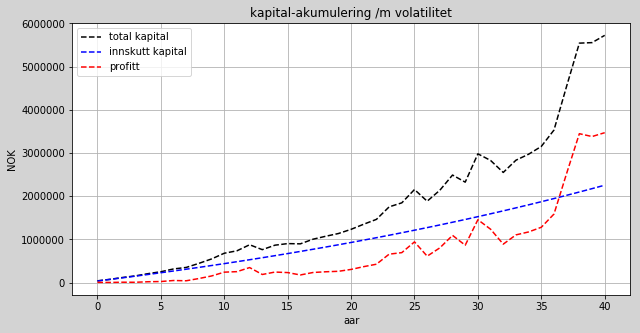

total kapital:  5,723,893 NOK
total innskutt: 2,253,960 NOK
total profitt:  3,469,932 NOK
profit/innskutt: 1.54


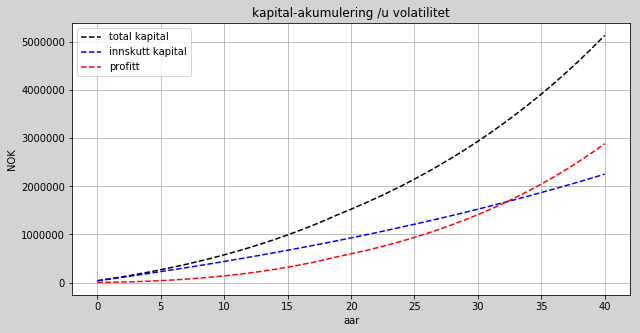

total kapital:  5,140,715 NOK
total innskutt: 2,253,960 NOK
total profitt:  2,886,754 NOK
profit/innskutt: 1.28


In [33]:
import matplotlib.pyplot as plt
import scipy.stats as stats

age = 24
retirement_age = 65
investment_years = retirement_age-age

kapital_risk = 0
kapital_risk_list = []

kapital_fixed = 0
kapital_fixed_list = []

innskudd_monthly = 3000
m_i_s = innskudd_monthly

innskutt = 0
innskutt_yearly = []

rate_of_return = 0.07
return_volatilitet = 0.1
inflation_rate = 0.02
fond_kostnad = 0.002

profitt = 0
profitt_risk_list = []
profitt_fixed_list = []

returns_liste = stats.norm.rvs(size=investment_years, loc=rate_of_return, scale=return_volatilitet)

for i in range(investment_years):
    
    kapital_risk += innskudd_monthly*12
    kapital_fixed += innskudd_monthly*12
    
    innskutt += innskudd_monthly*12
        
    kapital_risk *= 1+returns_liste[i]
    kapital_risk *= 1-inflation_rate
    kapital_risk *= 1-fond_kostnad
    
    kapital_fixed *= 1+rate_of_return
    kapital_fixed *= 1-inflation_rate
    kapital_fixed *= 1-fond_kostnad
    
    # Formueskattberegning
    if kapital_risk >= 1480000:
        kapital_risk *= 1-(0.007+0.0015)
        
    if kapital_fixed >= 1480000:
        kapital_fixed *= 1-(0.007+0.0015)
        
    kapital_risk_list.append(kapital_risk)
    kapital_fixed_list.append(kapital_fixed)
    
    innskutt_yearly.append(innskutt)
    
    profitt_risk_list.append(kapital_risk-innskutt)
    profitt_fixed_list.append(kapital_fixed-innskutt)
    
    innskudd_monthly *= 1+inflation_rate
    
print("måned. innskudd:  " + format(int(m_i_s), ',d'))
print("årlig avkastning: " + str(rate_of_return))
print("inflasjon:        " + str(inflation_rate))
print("fond kostnad:     " + str(fond_kostnad))

# Risk Plot

plt.figure(1, figsize=(10,5), 
           facecolor='lightgrey')

plt.grid(True)

plt.plot(kapital_risk_list, 'k--', label = "total kapital")
plt.plot(innskutt_yearly, 'b--', label = "innskutt kapital" )
plt.plot(profitt_risk_list, 'r--', label = "profitt")

plt.ylabel('NOK')
plt.xlabel('aar')
plt.title("kapital-akumulering /m volatilitet")

plt.legend()
plt.show()

print("total kapital:  " + format(int(kapital_risk_list[-1]), ',d') + " NOK")
print("total innskutt: " + format(int(innskutt_yearly[-1]), ',d') + " NOK")
print("total profitt:  " + format(int(profitt_risk_list[-1]), ',d') + " NOK")
print("profit/innskutt: "+ "%.2f" % (profitt_risk_list[-1]/innskutt_yearly[-1]))

# Fixed Plot

plt.figure(2, figsize=(10,5), 
           facecolor='lightgrey')

plt.grid(True)

plt.plot(kapital_fixed_list, 'k--', label = "total kapital")
plt.plot(innskutt_yearly, 'b--', label = "innskutt kapital" )
plt.plot(profitt_fixed_list, 'r--', label = "profitt")

plt.ylabel('NOK')
plt.xlabel('aar')
plt.title("kapital-akumulering /u volatilitet")

plt.legend()
plt.show()

print("total kapital:  " + format(int(kapital_fixed_list[-1]), ',d') + " NOK")
print("total innskutt: " + format(int(innskutt_yearly[-1]), ',d') + " NOK")
print("total profitt:  " + format(int(profitt_fixed_list[-1]), ',d') + " NOK")
print("profit/innskutt: "+ "%.2f" % (profitt_fixed_list[-1]/innskutt_yearly[-1]))

Compounding Annualized Growth Rate (CAGR) er det målet som viser hvor mange prosent investeringen måtte ha vokst i gjennmsnitt i året for å nå sitt nåværende nivå. F.eks. en investering som har doblet seg på 10 år, må ha vokst i gjennomsnitt 7% per år. Dette er ikke det samme som gjennomsnittlig vekst, hvor man enkelt og greit deler veksten på antall år. F.eks. 100% vekst på 10 år = 10% gjennomsnittlig vekst. 7% er mindre enn 10%. CAGR er som regel et litt lavere tall enn gjennomsnittlig vekst, pga. compounding effekten.

Hvis investeringen krympter med 50% et år og vokser med 100% det neste, har man da en total vekst på 50%? Nei, absolutt ikke; Man er tilbake der man startet. Prosentmessig tap veier tyngre enn prosentmessig økning. Dette fikk meg til å tenke litt. Hvis forventet avkastning er et moderat tall, f.eks. 7% i året, og volatiliteten er noe høy, f.eks. 20% i året, hva skjer med CAGR-en over en periode på 40 år? Volatiliteten kommer til å pushe avkastningen ned til negative tall, samt med å pushe den over forventet avkastning. Men siden negativ avkastning veier tyngre enn marginalt økt avkastning, burde ikke da CAGR over tid bli lavere? 

Programmet under er en simulering som sammenligner jevn vekst i forhold til volatil vekst med samme forventede årlig vekst. Simuleringen viser at hypotesen min var korrekt. Jo lavere forventet årlig avkastning er og hvor høy volatiliteten er, jo lavere blir CAGR.

In [66]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1

age = 24
retirement_age = 65
investment_years = retirement_age-age

rate_of_return = 0.073
return_volatilitet = 0.19

starting_value = 1

ror_random_list = []
ror_fixed_list = []

carg_random = []
carg_fixed = []

for i in range(10000):
    
    returns_liste = stats.norm.rvs(size=investment_years, 
                               loc=rate_of_return, 
                               scale=return_volatilitet)
    
    ror_random = starting_value
    ror_fixed  = starting_value
    
    ror_random_list = []
    ror_fixed_list = []

    for i in range(investment_years):
        
        ror_random *= 1+returns_liste[i]
        ror_random_list.append(ror_random)
        
        ror_fixed  *= 1+rate_of_return
        ror_fixed_list.append(ror_fixed)
        
    carg_random.append(CAGR(float(starting_value), ror_random, float(investment_years)))
    carg_fixed.append(CAGR(float(starting_value), ror_fixed, float(investment_years)))

print("%.6f" % np.mean(carg_random))
print("%.6f" % np.median(carg_random))

print("%.6f" % np.mean(carg_fixed))
print("%.6f" % np.median(carg_fixed))

0.055730
0.055804
0.073000
0.073000
